# CSMODEL Case Study - Phase 1

### Members:
- Angelo Guerra
- Adrian Yung Cheng
- Mark Daniel Gutierrez
- Alina Sayo

**Section**: S15

**Instructor**: Mr. Gabriel Avelino Sampedro

In this notebook, we will be using the **[Spotify Top Hits from 2000-2019](https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019/data)** Dataset. The notebook will cover an analysis of the raw dataset and various processes to extract meaningful insights and conclusions from the data.


## Importing Libraries

First, import the necessary libraries to perform data operation throughout this notebook:

In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-darkgrid")

* **Numpy** - Numpy is a software library for Python designed for working with arrays and encompassing functions related to linear algebra, fourier transforms, and matrices.
* **Pandas** - Pandas is a software library for Python designed for data manipulation and data analysis.
*  **Matplotlib** - Matplotlib is a software library for data visualization for Python, allowing us to easily render various types of graphs.
* **Seaborn** - Seaborn is a software library for data visualization for Python designed to create attractive and informative statistical graphics, making it easier to make complex visualizations compared to using Matplotlib alone.

## Dataset Description

### Brief Description

The dataset used throughout this notebook consists of a `.csv` file containing audio statistics of the top 2000 tracks from 2000-2019 on Spotify, a global audio streaming service. The data contains information about each track and its qualities, including the song artist, year it was released, popularity rate, and various characteristics. The dataset takes advantage of Spotify's huge collection of music to create a useful resource which could help those who want to statistically assess and analyze the platform's top hits from the past two decades.

### Collection Process

The dataset **[Top Hits Spotify 2000-2019](https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019/data)** was collected from a popular digital music streaming service called Spotify and was posted on Kaggle by user Mark Koverha. This dataset draws from Spotify’s extensive music catalog to create a comprehensive resource. Spotify has created multiple playlists for the top hits of each year. The data was then extracted from these playlists and Koverha collected it using the `Spotipy` library for Python.

Currently, Spotify provides a publicly available API. The Spotify Web API and the `Spotipy` Python library were utilized to gather track informaton to compile the dataset.

### Dataset File Structure

Each entry in the dataset is part of the top 2000 hit songs released during the year 2000 until 2019. On the other hand, each column represents a single component of the track that would detail its qualities, such as its artist name, title, and many other aspects, with a total of eighteen (18) specific variables to account for. There are a total of **2000 entries** and **18 variables** in the dataset.

The `read_csv()` function of the pandas library, in this case, is used to assign the dataset to a properly-usable variable in Python. The `info()` function, on the other hand, is used to display the general information about the dataset itself.

Now, let us load the data from the `songs_normalize.csv` file using the `read_csv` function and assign the resulting dataframe to the variable `spotify_df`. Then, we can use the `info` function to display a quick summary of how the data is structured.

In [4]:
spotify_df = pd.read_csv('songs_normalize.csv')
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


The `shape` function determines the dimensions of the dataframe (dataset) by getting the number of entries (rows) and variables (columns) and displaying them in a 2-tuple.

In [5]:
spotify_df.shape

(2000, 18)

Based on the code execution above, there are indeed **2000** entries and **18** variables present in the dataset.

We can then use the `describe()` function to provide a statistical description of the dataset and its variables that contain numerical data, which includes the count, mean, standard deviation, quartiles, and minimum/maximum values.

In [6]:
spotify_df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


By calling the `head()` function of the pandas library, the program will now display the first 5 (default value) rows/entries of the dataset. 

In [7]:
spotify_df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


To display the last 5 (default value) rows of the dataset, the `tail()` function will be used.

In [8]:
spotify_df.tail()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop
1999,Post Malone,Circles,215280,False,2019,85,0.695,0.762,0,-3.497,1,0.0395,0.1920,0.002440,0.0863,0.553,120.042,hip hop


### Variables

Each variable included in the dataset is a generalized form of specifying the different entries of the dataset in a substantial manner. The following are the variables used, their description/representation and data type:

| Variable         | Description/Representation | Datatype |
|------------------|----------------------------|----------|
| Artist           | The track's singer.    | Object |
| Title            | The track's name. | Object  |
| Duration_ms      | The track's duration in milliseconds.  | Integer |
| Explicit         | Dictates whether or not the track contains explicit content.    | Boolean |
| Year             | The track's release year.             | Integer |
| Popularity       | A measure that quantifies the popularity of the song. Ranges from 0 (least popular) to 100 (most popular). | Integer |
| Danceability     | A measure that represents the measure of a song's beat strength, rhythm stability, and tempo. Ranges from 0.0 (least danceable) to 1.0 (most danceable). | Float |
| Energy           | A measure of the track's intensity and activity. Ranges from 0.0 (least energy) to 1.0 (most energy). | Float |
| Key              | The music key of the track, represented as integers using the standard Pitch Class notation. If no key is detected, the value is -1. | Integer |
| Loudness         | A measure of the overall loudness of the track in decibels (dB), averaged across the entire track. | Float |
| Mode             | Indicates whether the track is in a major (1) or minor (0) scale. | Integer |
| Speechiness      | Measures the presence of spoken words in the track, with values closer to 1.0 indicating more speech content. While values closer to 0.0 most likely represent music and other non-speech-like tracks. | Float |
| Acousticness     | A confidence measure of whether the track is acoustic, with 1.0 representing high confidence that the track is acoustic. | Float |
| Instrumentalness | Predicts whether the track contains vocals, with values closer to 1.0 indicating a higher likelihood of no vocal content. | Float |
| Liveness         | Detects the presence of an audience in the recording, with higher values closer to 1.0 suggesting a live performance. | Float |
| Valence          | A measure describing the music positiveness of the track, ranging from 0.0 (negative emotions) to 1.0 (positive emotions). Where tracks with high valence sound happier and tracks with low valence sound sadder. | Float |
| Tempo            | The estimated tempo (speed or pace) of the track in beats per minute (BPM). | Float |
| Genre            | The genre of the track.    | Object |

## Data Cleaning

Before exploring and analyzing the dataset, data cleaning and preprocessing techniques shall first be performed to address inconsistencies within the dataset that could result in any erroneous data analysis.

The researchers have specifically checked for the following aspects in the dataset:
- Removing unused variables
- Checking for multiple representations in each variable
- Incorrect datatype of a variable
- Default values of a variable
- Missing data
- Duplicate data
- Inconsistent formatting of values

### Removing Unused Variables

To remove a specific entry or column from the dataset, the `drop()` function is called.

The researchers decided to remove the variables deemed unnecessary or outside the scope of this study. These consisted of numerical variables not concerned with the research question.

In [9]:
# Drop unnecessary variables
spotify_df = spotify_df.drop(['explicit', 'danceability', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'liveness', 'valence', 'genre'], axis = 1)
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   year              2000 non-null   int64  
 4   popularity        2000 non-null   int64  
 5   energy            2000 non-null   float64
 6   instrumentalness  2000 non-null   float64
 7   tempo             2000 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 125.1+ KB


The variables `explicit`, `danceability`, `key`, `loudness`, `mode`, `speechiness`, `valence`, and `genre` were removed because such components shall not be used in this study. In this way, the study will only dataset will only be focusing on the necessary variables.

### Check for Multiple Representations

To check whether or not the dataset contains multiple representations of values for variables with categorical data, the `value_counts()` function of the pandas library can be called to return the count of each unique value in the Series.

In [10]:
# Check if there are any mispelled or incorrect values in Artist
print(spotify_df['artist'].value_counts())

artist
Rihanna           25
Drake             23
Eminem            21
Calvin Harris     20
Britney Spears    19
                  ..
Sidney Samson      1
Cam’ron            1
Elvis Presley      1
Lucenzo            1
Blanco Brown       1
Name: count, Length: 835, dtype: int64


In [11]:
# Check if there are any mispelled or incorrect values in Song
print(spotify_df['song'].value_counts())

song
Sorry                   5
Don't                   3
Closer                  3
Breathe                 3
It's My Life            3
                       ..
Dani California         1
What Hurts The Most     1
You Know I'm No Good    1
Ms. New Booty           1
Circles                 1
Name: count, Length: 1879, dtype: int64


According to the results executed by the code, all unique values within the `artist` and `song` categorical variables of the dataset fit their valid parameters and are correctly represented.

### Check for Incorrect Datatypes

To check the data type of every variable/column in the dataset, the `dtypes` property of a dataframe in the pandas library can also be called aside from the `info()` function to assess whether the assigned datatype is correct for the corresponding variable. The code below will list down every variable and its corresponding data type.

In [12]:
spotify_df.dtypes

artist               object
song                 object
duration_ms           int64
year                  int64
popularity            int64
energy              float64
instrumentalness    float64
tempo               float64
dtype: object

Based on the datatypes displayed from the code execution, all variables in the dataset have their appropriate corresponding datatype assigned to them based on their description.

### Check for Default Values

To check if there exists default values placed per variable in the dataset, the `unique()` method can be used to list down all unique values per variable.

In [13]:
for col in spotify_df:
    print("'{}' column's unique values:\n".format(col), spotify_df[col].unique())
    print("")

'artist' column's unique values:
 ['Britney Spears' 'blink-182' 'Faith Hill' 'Bon Jovi' '*NSYNC' 'Sisqo'
 'Eminem' 'Robbie Williams' "Destiny's Child" 'Modjo' "Gigi D'Agostino"
 'Eiffel 65' "Bomfunk MC's" 'Sting' 'Melanie C' 'Aaliyah' 'Anastacia'
 'Alice Deejay' 'Dr. Dre' 'Linkin Park' 'Tom Jones' 'Sonique' 'M.O.P.'
 'Limp Bizkit' 'Darude' 'Da Brat' 'Moloko' 'Chicane' 'DMX'
 'Debelah Morgan' 'Madonna' 'Ruff Endz' 'Montell Jordan' 'Kylie Minogue'
 'JAY-Z' 'LeAnn Rimes' 'Avant' 'Enrique Iglesias' 'Toni Braxton' 'Bow Wow'
 'Missy Elliott' 'Backstreet Boys' 'Samantha Mumba' 'Mýa' 'Mary Mary'
 'Next' 'Janet Jackson' 'Ricky Martin' 'Jagged Edge' 'Mariah Carey'
 'Baha Men' 'Donell Jones' 'Oasis' 'DJ Ötzi' 'P!nk' 'Craig David'
 'Christina Aguilera' 'Red Hot Chili Peppers' 'Sammie' 'Santana' 'Kandi'
 'Vengaboys' 'Ronan Keating' 'Madison Avenue' 'Céline Dion' '3 Doors Down'
 'Carl Thomas' 'Mystikal' 'Fuel' 'Savage Garden' 'Westlife' 'All Saints'
 'Erykah Badu' 'Marc Anthony' 'Matchbox Twenty' 'G

According to the results provided by the function, only the `year` variable contained data that did not fit its parameters (years from 2000 to 2019 only). The rest of the variables' unique values fit their respective parameters based on their description.

Given this finding, the dataframe could be preprocessed and filtered to include entries only within the valid timeframe through querying.

In [14]:
# Select entries that have a release year date from 2000 to 2019 only, then assign back to the dataframe
spotify_df = spotify_df[(spotify_df['year'] >= 2000) & (spotify_df['year'] <= 2019)]
spotify_df.shape

(1958, 8)

After dropping the invalid records, calling the `shape` of the newly-updated dataset displayed only **1958 remaining entries**. This meant that out of the initial 2000 entries of the dataset, there were **42 invalid entries** removed.

### Check for Missing Data

To check for missing data within the dataset, the `isnull()` and `any()` functions can be used to assess if there exists null values per variable represented as `NaN` or `null`. The given function call will list each variable with a boolean value indicating whether it has null values or none.

In [15]:
spotify_df.isnull().any()

artist              False
song                False
duration_ms         False
year                False
popularity          False
energy              False
instrumentalness    False
tempo               False
dtype: bool

Based on the results provided by the code execution, all the variables in the dataset do not contain any null values.

### Check for Duplicate Data

To check for duplicated data within the dataset, the `duplicated()`  and `any()` function can be called to identify whether or not there are duplicate records. The code below will either return a boolean value `True` if there exists repeated records and `False` if there are none.

In [16]:
spotify_df.duplicated().any()

True

Based on the provided result of the function, we can conclude the dataset contains duplicate records. Given this finding, the `drop_duplicates()` function can be used to remove these records.

In [17]:
spotify_df = spotify_df.drop_duplicates()
spotify_df.shape

(1899, 8)

The new dataset that does not include duplicate records now contain **1899 unique records**. This meant that there were **59 duplicate records** present in the initial dataset.

### Checking for Inconsistent Formatting

To check if there exists any values in the dataset with inconsistent formatting, the `unique()` function can once again be called. The code below will list down all the unique values in a given variable.

In [18]:
for col in spotify_df:
    print("'{}' column's unique values:\n".format(col), spotify_df[col].unique())
    print("")

'artist' column's unique values:
 ['Britney Spears' 'Bon Jovi' '*NSYNC' 'Eminem' 'Robbie Williams' 'Modjo'
 "Gigi D'Agostino" "Bomfunk MC's" 'Aaliyah' 'Alice Deejay' 'Linkin Park'
 'Sonique' 'M.O.P.' 'Limp Bizkit' 'Darude' 'Da Brat' 'Moloko' 'Chicane'
 'Debelah Morgan' 'Madonna' 'Ruff Endz' 'Kylie Minogue' 'LeAnn Rimes'
 'Avant' 'Toni Braxton' 'Bow Wow' 'Samantha Mumba' 'Mýa' 'Mary Mary'
 'Next' 'Janet Jackson' 'Ricky Martin' 'Jagged Edge' 'JAY-Z' 'Baha Men'
 'Oasis' 'DJ Ötzi' 'P!nk' 'Mariah Carey' 'Craig David' 'Sammie' 'Kandi'
 'Vengaboys' 'Ronan Keating' '3 Doors Down' 'Carl Thomas' 'Mystikal'
 'Fuel' 'Westlife' 'All Saints' "Destiny's Child" 'Erykah Badu'
 'Matchbox Twenty' 'Gabrielle' 'Backstreet Boys' 'The Corrs' 'Joe' 'Nelly'
 'Shaggy' 'Christina Aguilera' 'Nelly Furtado' 'Shakira' 'Jimmy Eat World'
 'Train' 'Geri Halliwell' 'Blu Cantrell' 'Missy Elliott' 'Mary J. Blige'
 'Faithless' 'Lasgo' 'iio' 'Emma Bunton' '112' 'Blue' 'Jessica Simpson'
 'Michael Jackson' 'Eve' 'Jennifer Lo

Upon checking the results, the dataset's variables seems to not contain any values with inconsistencies in its formatting based on their corresponding description.

## Exploratory Data Analysis

We are performing Exploratory Data Analysis (EDA) in order to comprehend and orient the dataset in such a way that would be much more efficient to understand. Generally, this involves creating data representations and numerical summaries to properly visualize the nature of the data and create properly-oriented assumptions that would, upon requirement, formulate a specific research question.

One of the key variables included in the dataset is the `year` variable, which essentially indicates the year the top hit track got released. Given the dataset's emphasis on analyzing the evolution of the top hits' qualities over time, the variable and its corresponding relationships represent a potential point of interest that the EDA can be revolved around.

Among the 18 variables in the dataset, 14 are numerical in nature: `duration_ms`, `year`, `popularity`, `danceability`, `energy`, `key`, `loudness`, `mode`, `speechiness`, `acousticness`, `instrumentalness`, `liveness`, `valence`, and `tempo`. However, the EDA for this notebook will only be focusing on the variables `duration_ms`, `instrumentalness` and `tempo` due to their consistent and applicable nature with relations to a song's release year. By analyzing the `year` variable in conjunction with the 5 numerical variables, the researchers can further narrow down the scope of the EDA as well as maintain some form onf consistency in the data analysis strategies used.

With the aforementioned attributes in mind, the following EDA questions are investigated to gain insights into possible patterns associated with the track's release year:

1. What is the distribution of songs according to release year?

2. What is (a) the distribution of songs according to duration and (b) the average duration of top hits per year?

3. What is (a) the distribution of the songs according to their level of instrumentalness and (b) the average instrumentalness level per year?

4. What is (a) the distribution of the songs according to their level of tempo and (b) the average tempo level per year?

5. What is the relationship between the tracks' duration, instrumentalness, and tempo with the release year?

### Question 1: What is the distribution of top hits according to release year?

To answer this question, we obtain our numerical summaries and data visualizations based on the `year` and `songs` variables. The `year` variable is used to group and segregate the data into the different release years available, while the `songs` variable possess the top-hits songs released at a specified year.

To begin, we first reassign the required data taken from `spotify_df` into a new dataframe `songs_per_year`. This would indicate the distribution and relationship of the release years available in the `spotify_df` dataframe and the number of songs released each year.



#### Numerical Summaries


In [27]:
songs_per_year = spotify_df.year.value_counts().reset_index(name='songs')

When observed, the new dataframe `songs_per_year` should contain both the release years present in the dataset and the top-hits songs each year.

In [28]:
songs_per_year 

,year,songs
0,2012,113
1,2017,110
2,2001,106
3,2018,104
4,2010,103
5,2005,101
6,2014,100
7,2016,98
8,2011,96
9,2004,95


#### Data Visualization

*Bar Plot*

One of the methods that we can utilize to visualize the distribution of `songs` per `year` is a `bar plot` to show the different number of songs released per year and their relationship to one another.

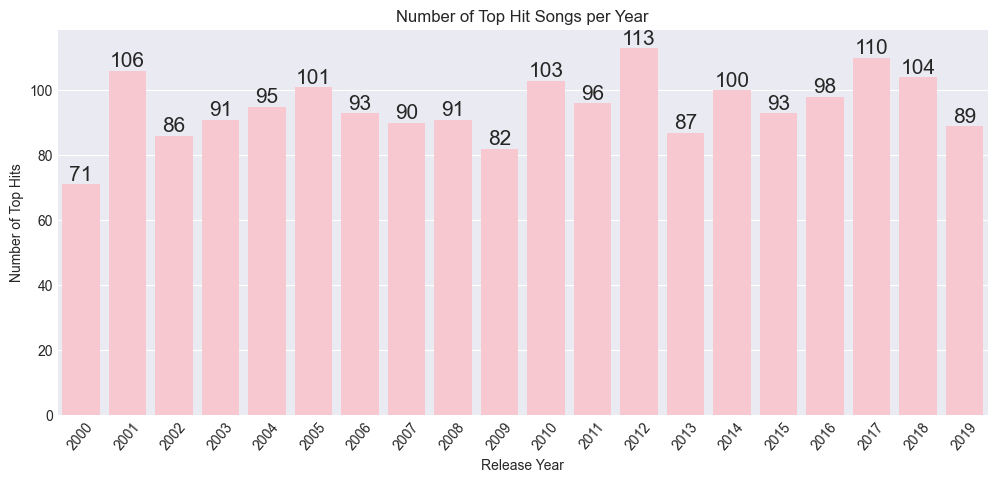

In [29]:
# bar plot of the number of songs per year
plt.figure(figsize=(12, 5))
ax = sb.barplot(x = 'year', y ='songs', data = songs_per_year, color='pink')

# add labels
plt.title('Number of Top Hit Songs per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Top Hits')
plt.xticks(rotation = 50)

# label on top of each bar
for container in ax.containers:
    ax.bar_label(container, size=15)

plt.show()

// post interpretation

### Question 2: What is (a) the distribution of songs according to duration and (b) the average duration of top hits per year?

The second question centers around 2 relative concepts: the distribution of songs according to duration, and the average duration of top hits per year. This question mainly revolves around the usage of the `duration_ms` variable and its respective relationship with the `year` variable.

To efficiently obtain the necessary results centered around the `duration_ms` variable, we will be employing the usage of a conversion function that would essentially convert the song duration obtained from the dataframe and change it into a `minute:second` format.

In [33]:
# convert ms to min:sec
def ms_to_min_sec(ms):
    minutes = int(ms / 60000)
    seconds = int((ms % 60000) / 1000)
    return str(minutes) + ":" + str(seconds)

#### Numerical Summaries


We can find the mean, median, and standard deviation of the `duration_ms` variable using the `agg` function.

In [39]:
spotify_df.agg({'duration_ms': ['mean', 'median', 'std']})
#ENTER ACTUAL CODE HERE

,duration_ms
mean,228123.525540
median,222920.000000
std,39116.687604


In [45]:
# convert ms to min:sec
def ms_to_min_sec(ms):
    minutes = int(ms / 60000)
    seconds = int((ms % 60000) / 1000)
    return str(minutes) + ":" + str(seconds)

# Organizing a dataframe with the average duration of the top hits from the analyzed period
average_duration = spotify_df[['duration_ms','year']].groupby('year').mean().reset_index()
average_duration['min:sec'] = average_duration['duration_ms'].apply(ms_to_min_sec)
average_duration[['year','min:sec']]

,year,min:sec
0,2000,4:10
1,2001,4:2
2,2002,4:11
3,2003,3:56
4,2004,3:53
5,2005,3:57
6,2006,3:58
7,2007,3:52
8,2008,3:54
9,2009,3:55


// post interpretation

#### Data Visualization

*Scatterplot*

To cleanly visualize the relationship between the 2 variables, we utilized a scatterplot according to the the duration of top-hit songs and their release year.

With the `lmplot` function, we visually aligned the data based on the release `year` and assigned its counterpart variable as `Duration (ms)`.

Text(2.015625000000009, 0.5, 'Duration (ms)')

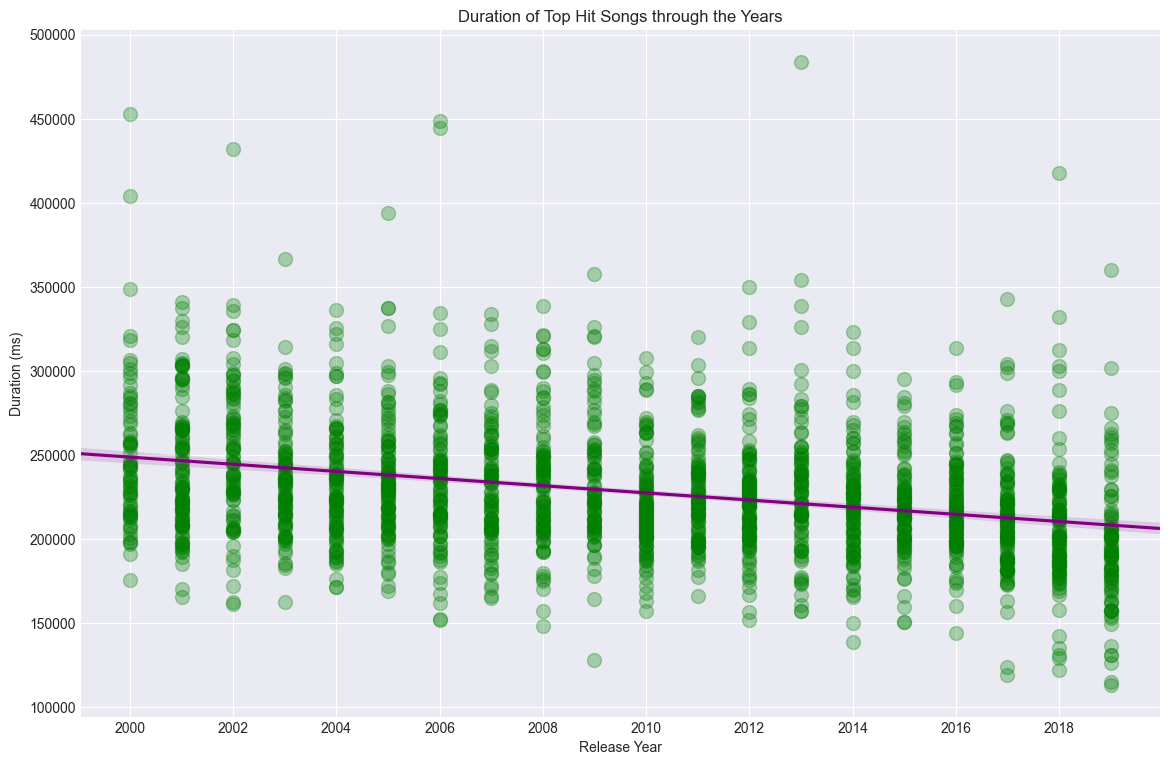

In [38]:
# generate scatter plot with trendline
scatter = sb.lmplot(x = 'year', y = 'duration_ms', data = spotify_df, height = 5, aspect = 2, truncate = False, scatter_kws = {'s': 100, 'alpha': 0.3, 'color': 'green'}, line_kws = {'color': 'purple'})

# adjust size
scatter.figure.set_size_inches(12, 8)

# add labels
plt.title('Duration of Top Hit Songs through the Years')
plt.xlabel('Release Year')
plt.xticks(np.arange(2000, 2020, 2))
plt.ylabel('Duration (ms)')

// post interpretation

### Question 3: What is (a) the distribution of the songs according to their level of instrumentalness and (b) the average instrumentalness level per year?

Similar to the previous question, the third question also revolves around the relationship between the instrumentalness level of each song, represented by `instrumentalness`, and its corresponding release year, represented by `year`. This specific question observes the distribution of the songs according to instrumentalness, and the average level of instrumentalness per year.

#### Numerical Summaries

To obtain the mean, median, and standard deviation of the `instrumentalness` variable, we can use the `agg` function.

In [48]:
# get the mean median and std
spotify_df.agg({'instrumentalness': ['mean', 'median', 'std']})


,instrumentalness
mean,0.015525
median,0.000000
std,0.089036


post interpretation

#### Data Visualization

*Histogram*

Histograms are utilized to represent the distribution of the `instrumentalness` variable. The `histplot` function can accomplish this with ease, representing the instrumentalness levels as the bars in `"pink"`. 

Text(0, 0.5, 'Number of Top Hits')

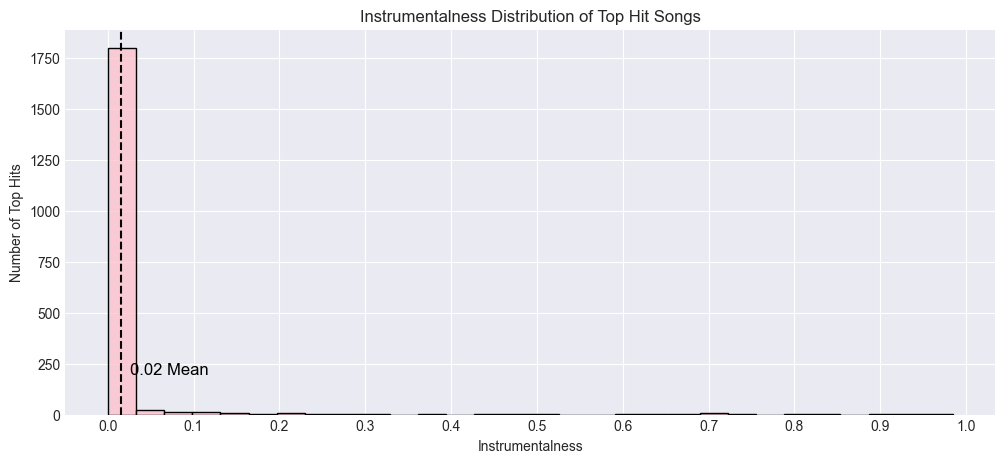

In [40]:
# generate the histogram
plt.figure(figsize=(12, 5))
ax = sb.histplot(data = spotify_df, x = 'instrumentalness', bins = 30, color = 'pink')

# add vertical line
plt.axvline(x = np.mean(spotify_df.instrumentalness), color = 'black', linestyle = '--')
plt.text(x = np.mean(spotify_df.instrumentalness) + 0.01, y = 200, s = '0.02 Mean', color = 'black', fontsize = 12)

# add labels
plt.title('Instrumentalness Distribution of Top Hit Songs')
plt.xlabel('Instrumentalness')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.ylabel('Number of Top Hits')


### Question 4: What is (a) the distribution of the songs according to their level of tempo and (b) the average tempo level per year?

The current EDA question delves into the distribution of songs according to their tempo, and the average level of tempo per year, similar to the previous questions. To do this, we focus on the `year` and `tempo` variables.

#### Numerical Summaries

We will once again use the `agg` function to obtain the mean, median, and standard deviation of the tempo levels of the entire dataframe year period. 

In [41]:
# get the mean median and std
spotify_df.agg({'tempo': ['mean', 'median', 'std']})


,tempo
mean,120.115425
median,120.028000
std,26.986107


#### Data Visualization

*Histogram*

We visualize the data of `tempo` using a histogram once again in order to include the decimal ranges. To accomplish this, we have used the `histplot` function for data visualization, and a `mean` function to represent the average of the current data.

Text(0, 0.5, 'Number of Top Hits')

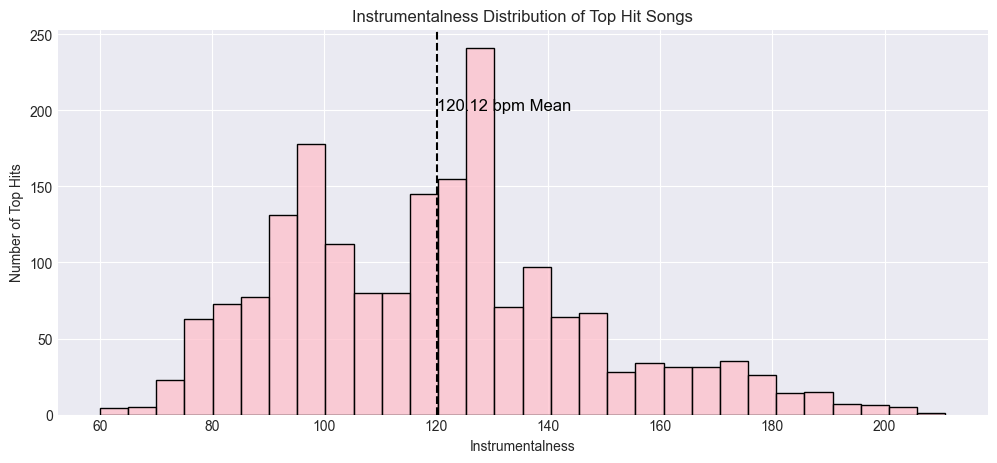

In [42]:
# generate the histogram
plt.figure(figsize=(12, 5))
ax = sb.histplot(data = spotify_df, x = 'tempo', bins = 30, color = 'pink')

# add vertical line
plt.axvline(x = np.mean(spotify_df.tempo), color = 'black', linestyle = '--')
plt.text(x = np.mean(spotify_df.tempo) + 0.01, y = 200, s = '120.12 bpm Mean', color = 'black', fontsize = 12)

# add labels
plt.title('Instrumentalness Distribution of Top Hit Songs')
plt.xlabel('Instrumentalness')
plt.ylabel('Number of Top Hits')


post interpretation

### Question 5: What is the relationship between the tracks' duration, instrumentalness, and tempo with the release year?

Lastly, to find the general relationship between all the variables utilized (`duration_ms`, `instrumentalness`, `tempo`) towards the `year` variable. we must compute the values corresponding to their correlation.

#### Numerical Summaries

We can use the `.corr()` function of the pandas library to easily obtain the correlation values.

In [45]:
instru_tempo_year = spotify_df[[ 'instrumentalness', 'tempo', 'year']]
corr = instru_tempo_year.corr()
corr

,instrumentalness,tempo,year
instrumentalness,1.000000,0.035449,-0.055978
tempo,0.035449,1.000000,0.082748
year,-0.055978,0.082748,1.000000


#### Data Visualization

After computation, we can proceed to visualization using seaborn to display a correlation heatmap for easy analysis with the help of the `subplots`, `triu`, `diverging_palette`, and `heatmap functions.`

<Axes: >

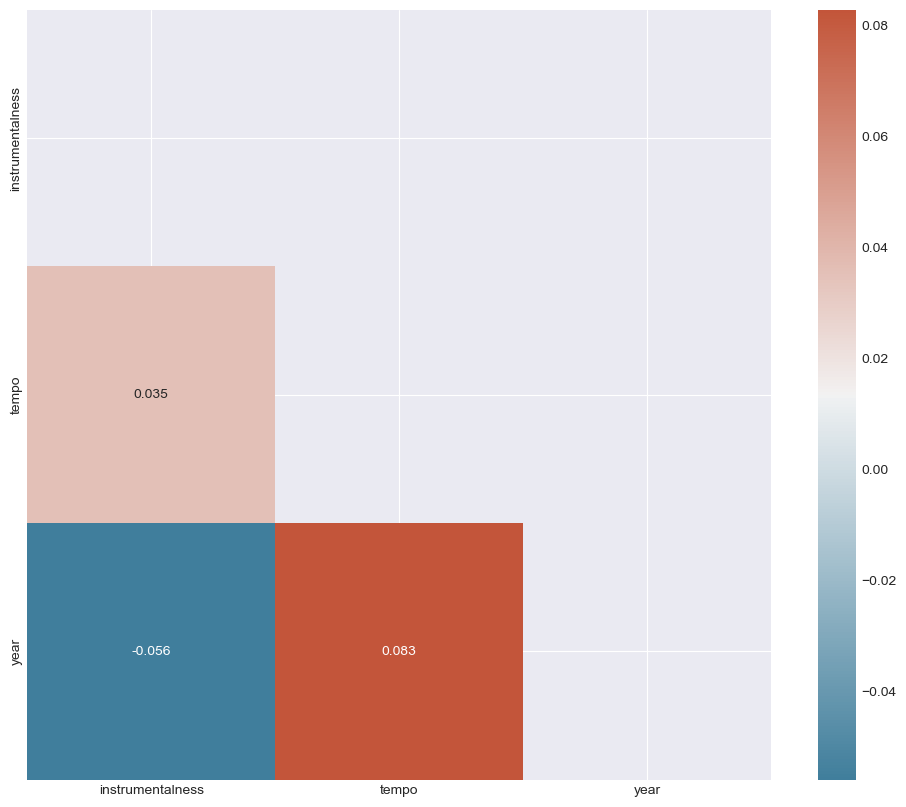

In [53]:
# Heatmap Design
f, ax = plt.subplots(figsize = (12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sb.diverging_palette(230, 20, as_cmap=True)

sb.heatmap(corr, annot=True, cmap=cmap, mask=mask)

## Research Question

In the Exploratory Data Analysis portion of this notebook, the questions stated were heavily oriented towards understanding the relationship between the different numerical variables present in the dataset with a song's release year, specifically the `year` variable. In doing so, the goal of the EDA was to determine whether or not a trend was present in the relationships acquired. By focusing on the numerical values present in the dataset, we were able to visualize and confirm that the data could be used in a predictive manner.

As such, with the proper investigation and solving the questions stated in the Exploratory Data Analysis portion of the notebook, the following research question was hypothesized:

---
### Can we cluster and determine when a song is/was released depending on the following variables: (1) duration, (2) instrumentalness, and (3) tempo?
---

### Rationale for Research Question based on EDA

### Significance of Research Question

Providing insights and answers for this research question would have the potential to aid in identifying how music has evolved over time and how they reflect the musical trend of each period. Doing so would enable people to obtain a deeper and more meaningful understanding of the historical and cultural context and meaning of music. The study may also improve current predictive measures and further expand its applications in technological and musical aspects such as artificial intelligence prediction, music recommendation systems, music generation, etc.